In [ ]:
import numpy as np

In [ ]:
class ODESolver:

    def __init__(self, f) -> None:
        # Wrap user’s f in a new function that always
        # converts list/tuple to array (or let array be array)

        self.f = lambda t, u: np.asarray(f(t,u), float)

    def set_initial_condition(self, u0):

        if isinstance(u0, (float, int)):     # if scalar ODE
            self.neq = 1                     # num of equations
            u0 = float(u0)
        else:
            u0 = np.asarray(u0)
            self.neq = u0.size

        self.u0 = u0

    def solve(self, t_span, N):
        """Compute solution for t_span[0] <= t <= t_span[1], using N steps."""

        t0, T = t_span
        self.dt = T / N
        self.t = np.zeros(N+1)              #N steps ~ N+1 time points
        if self.neq == 1:
            self.u = np.zeros(N+1)
        else:
            self.u = np.zeros((N+1, self.neq))

        self.t[0] = t0
        self.u[0] = self.u0

        for n in range(N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            self.u[n+1] = self.advance()
    
        return self.t, self.u


In [ ]:
class RungeKutta4(ODESolver):


    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = self.dt
        dt2 = dt/2.0
        k1 = f(t[n], u[n],)
        k2 = f(t[n] + dt2, u[n] + dt2*k1, )
        k3 = f(t[n] + dt2, u[n] + dt2*k2, )
        k4 = f(t[n] + dt, u[n] + dt*k3, )
        unew = u[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        return unew

In [ ]:
def f(t, u):
    return np.array([-u[1], u[0]])

Making dataset. We create 1000 samples for training and 100 samples for validation. For this task we are using Runge Katta method.

In [ ]:
t_span = (0, 2*np.pi)   # t_span == [a, b]
N = 10
fe = RungeKutta4(f)
fe.set_initial_condition(u0=(1, 0))
cols, u1 = fe.solve(t_span, N)
df = pd.DataFrame(columns=cols)
for i in range(1000):
    fe = RungeKutta4(f)
    fe.set_initial_condition(u0=((i+1)/1000, 0))
    t1, u1 = fe.solve(t_span, N)
    temp_df = pd.DataFrame(
        [u1[:, 0]], columns=cols
    )
    df = df.append(temp_df)
df.to_csv('x.csv')

In [ ]:
t_span = (0, 2*np.pi)   # t_span == [a, b]
N = 10239
fe = RungeKutta4(f)
fe.set_initial_condition(u0=(1, 0))
cols, u1 = fe.solve(t_span, N)
df = pd.DataFrame(columns=cols)
for i in range(1000):
    fe = RungeKutta4(f)
    fe.set_initial_condition(u0=((i+1)/1000, 0))
    t1, u1 = fe.solve(t_span, N)
    temp_df = pd.DataFrame(
        [u1[:, 0]], columns=cols
    )
    df = df.append(temp_df)
df.to_csv('y.csv')

In [ ]:
t_span = (0, 2*np.pi)   # t_span == [a, b]
N = 10
fe = RungeKutta4(f)
fe.set_initial_condition(u0=(1, 0))
cols, u1 = fe.solve(t_span, N)
df = pd.DataFrame(columns=cols)
for i in range(100):
    fe = RungeKutta4(f)
    fe.set_initial_condition(u0=((i+1)/10 + 1, 0))
    t1, u1 = fe.solve(t_span, N)
    temp_df = pd.DataFrame(
        [u1[:, 0]], columns=cols
    )
    df = df.append(temp_df)
df.to_csv('x_valid.csv')

In [ ]:
t_span = (0, 2*np.pi)   # t_span == [a, b]
N = 10239
fe = RungeKutta4(f)
fe.set_initial_condition(u0=(1, 0))
cols, u1 = fe.solve(t_span, N)
df = pd.DataFrame(columns=cols)
for i in range(100):
    fe = RungeKutta4(f)
    fe.set_initial_condition(u0=((i+1)/10 + 1, 0))
    t1, u1 = fe.solve(t_span, N)
    temp_df = pd.DataFrame(
        [u1[:, 0]], columns=cols
    )
    df = df.append(temp_df)
df.to_csv('y_valid.csv')

In [1]:
import numpy as np
import scipy
import csv
from tqdm.auto import tqdm

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [3]:
class MyDataset(Dataset):
  def __init__(self, x_file, y_file, x_len=11, y_len=10240, transform=None):
    self.x = pd.read_csv(x_file)
    self.y = pd.read_csv(y_file)
    self.transform = transform
    self.x_len = x_len
    self.y_len = y_len

  def __len__(self):
    return len(self.x)
  
  def __getitem__(self, index):
    rough = torch.tensor(self.x.iloc[index])[1:].reshape(-1, self.x_len).float()
    accurate = torch.tensor(self.y.iloc[index])[1:].reshape(-1, self.y_len).float()
    return rough, accurate

In [4]:
x_path = '/content/drive/MyDrive/colab/vmat/1/x.csv'
y_path = '/content/drive/MyDrive/colab/vmat/1/y.csv'
data = MyDataset(x_path, y_path)

In [5]:
x_val_path = '/content/drive/MyDrive/colab/vmat/1/x_valid.csv'
y_val_path = '/content/drive/MyDrive/colab/vmat/1/y_valid.csv'
data_val = MyDataset(x_val_path, y_val_path)

In [6]:
from torch.utils.data.dataloader import DataLoader
dataloader = DataLoader(data, batch_size=32, shuffle=True)

In [7]:
dataloader_val = DataLoader(data_val, batch_size=32, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 1, 11])
Labels batch shape: torch.Size([32, 1, 10240])


In [ ]:
test_features, test_labels = next(iter(dataloader_val))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([32, 1, 11])
Labels batch shape: torch.Size([32, 1, 10240])


Model

In [8]:
class Lin(nn.Module):
  def __init__(self, ni=11, no=10240):
    super(Lin, self).__init__()
    self.lin = nn.Linear(ni, no)

  def forward(self, x):
    return self.lin(x)

In [9]:
def make_plot(pred, target, t):
  pr = pred.detach().cpu().squeeze()
  tar = target.cpu().squeeze()

  figure, axis = plt.subplots(1, 2)

  axis[0].plot(t, pr)
  axis[0].set_title("Predict")

  axis[1].plot(t, tar)
  axis[1].set_title("Target")

  plt.show()

In [10]:
lr = 0.003
device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.MSELoss()

In [11]:
model = Lin().to(device)

In [16]:
opt = torch.optim.Adam(model.parameters(), 
                           lr=lr)

In [ ]:
def weights_init(m):
  if isinstance(m, nn.Linear):
    nn.init.normal_(m.weight, 0.0, 0.02)

In [13]:
from pathlib import Path
MODEL_PATH = Path("/content/drive/MyDrive/colab/vmat/1/lin1.pth")
model.load_state_dict(torch.load(f=MODEL_PATH))

<All keys matched successfully>

In [ ]:
model = model.apply(weights_init)

In [14]:
def get_add_loss(output): ## additional loss
  loss = torch.sum((output[..., :-1] - output[..., 1:])**2)
  return loss

  0%|          | 0/32 [00:00<?, ?it/s]

tensor(3.4729e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.2879e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(7.6720e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(5.6024e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(3.4889e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(1.3859e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(8.5720e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(6.4991e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.3073e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.5410e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(5.1958e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(3.3392e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.9004e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.8215e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.1487e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(1.6610e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.2455e-05, device='cuda:0', grad

  0%|          | 0/32 [00:00<?, ?it/s]

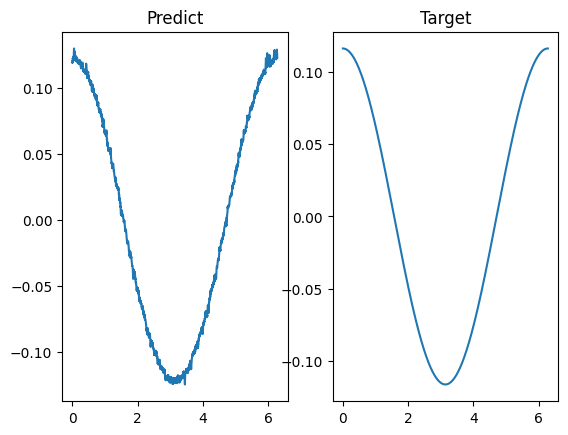

tensor(1.7240e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


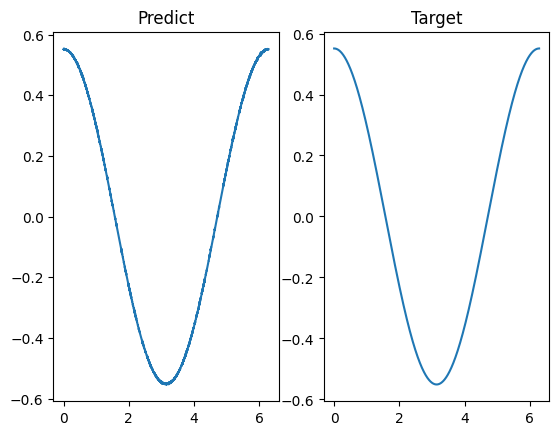

tensor(1.1817e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


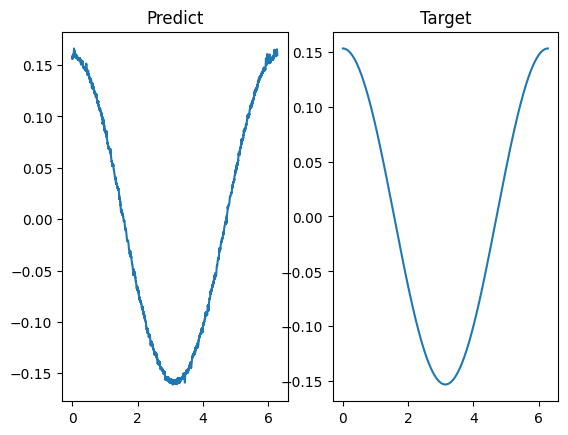

tensor(1.9117e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


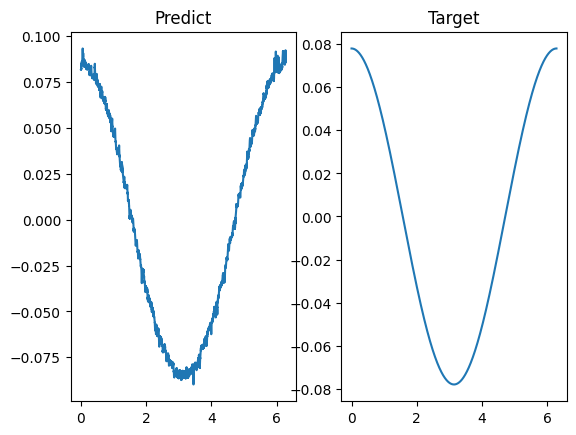

tensor(2.2476e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


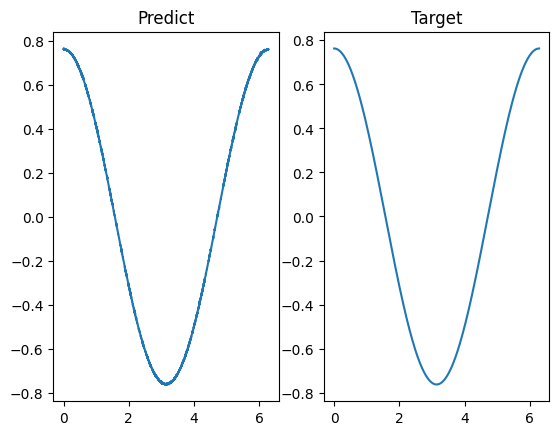

tensor(1.4040e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


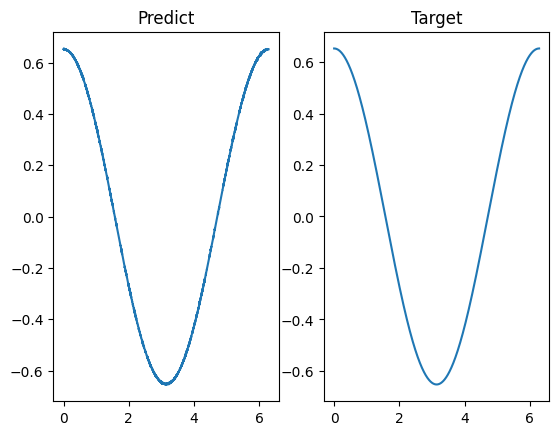

tensor(1.5132e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


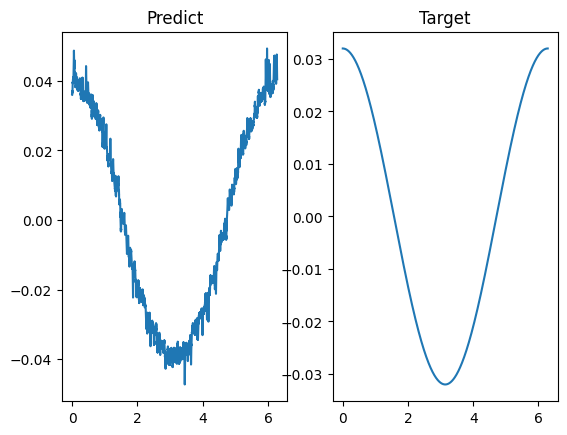

tensor(2.0116e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


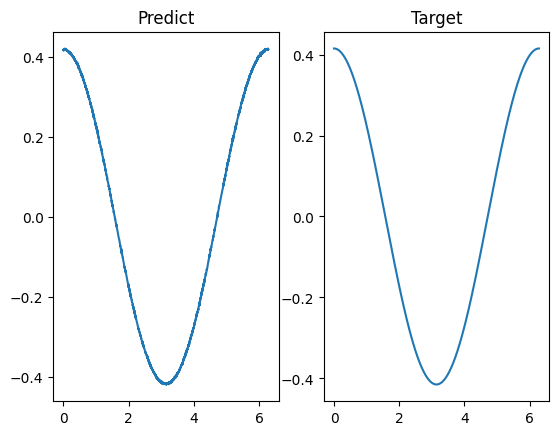

tensor(1.9495e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


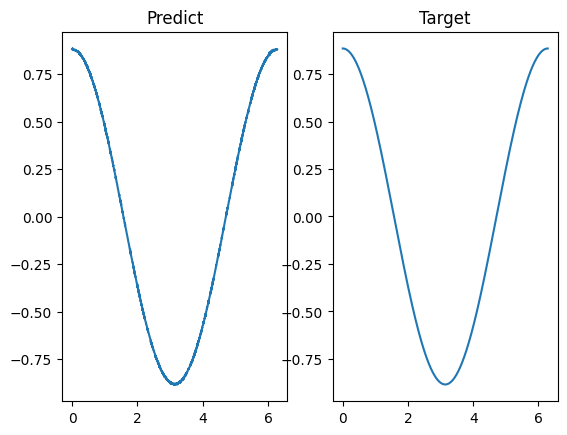

tensor(1.5166e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


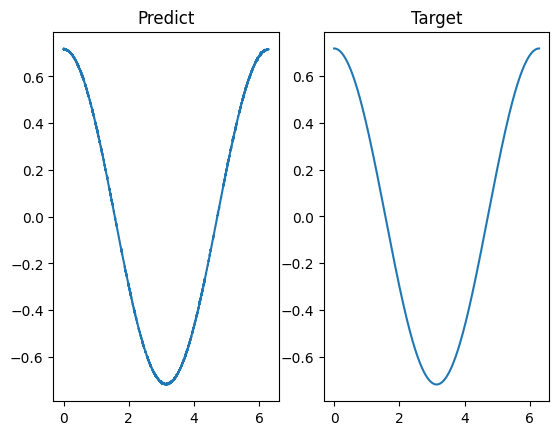

tensor(1.3281e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


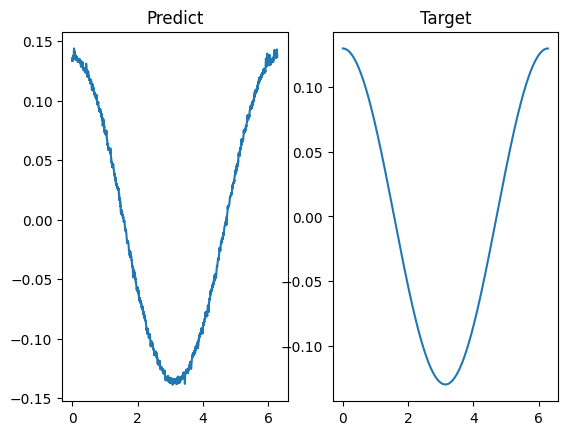

tensor(1.7253e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


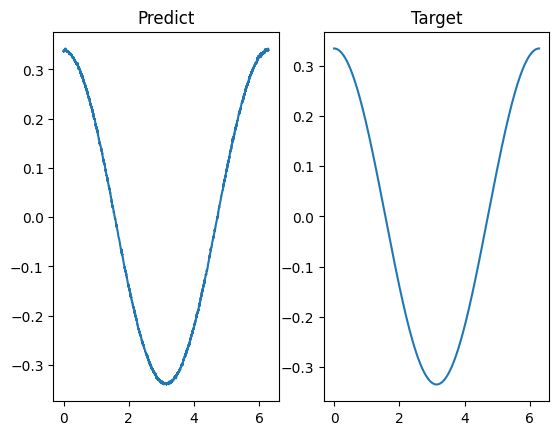

tensor(1.7994e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


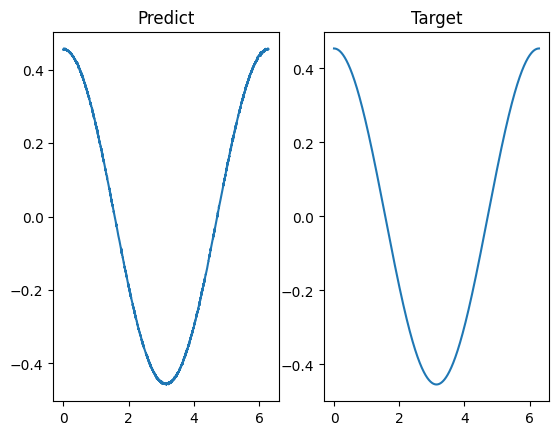

tensor(1.6806e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


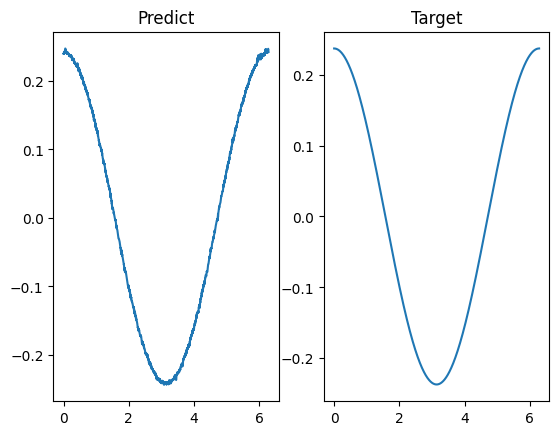

tensor(1.2680e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


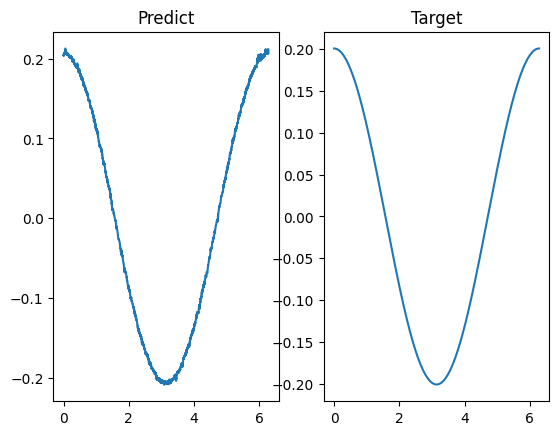

tensor(1.5038e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


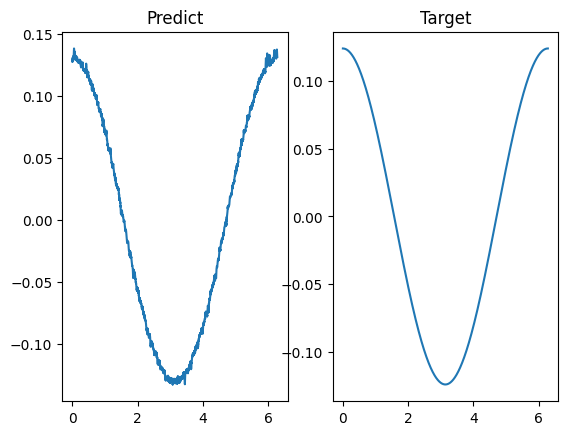

tensor(1.3983e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


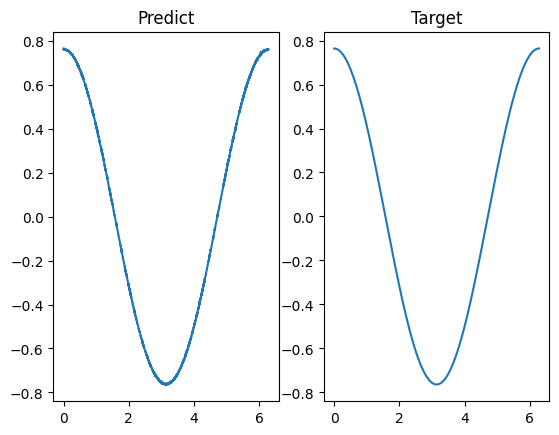

tensor(1.2792e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


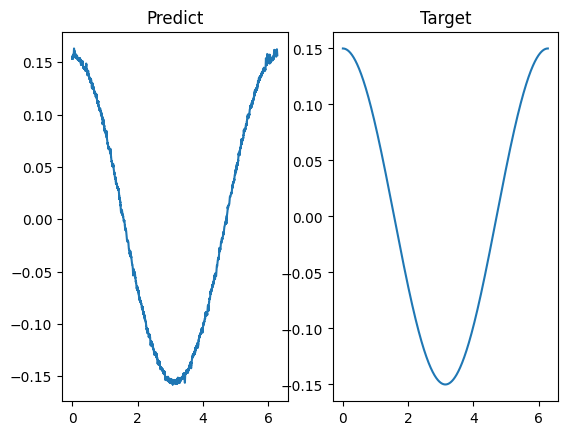

tensor(1.4496e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


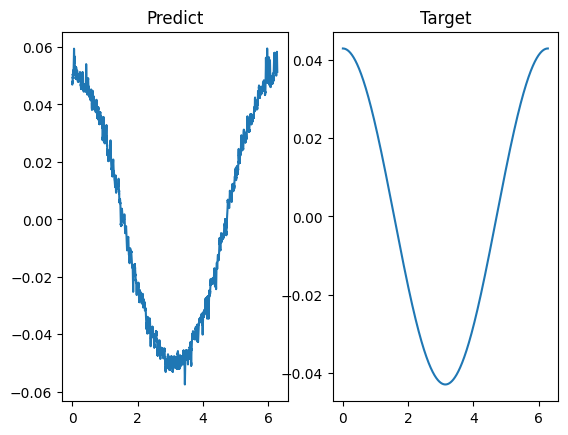

tensor(1.3917e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


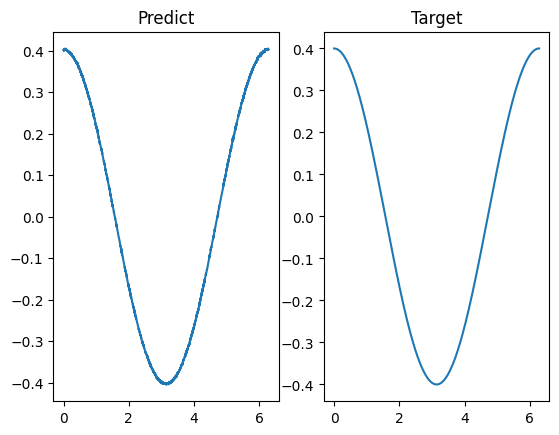

tensor(1.5072e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


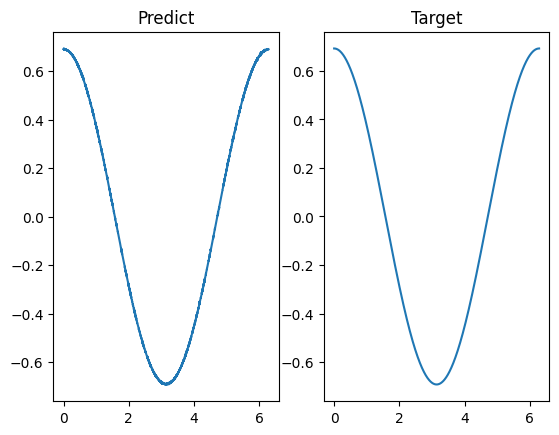

tensor(1.6706e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


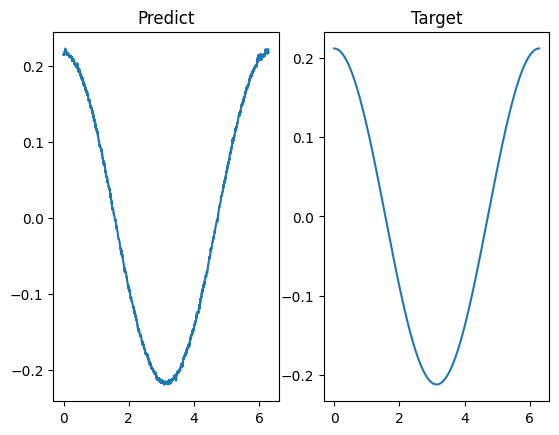

tensor(1.5378e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


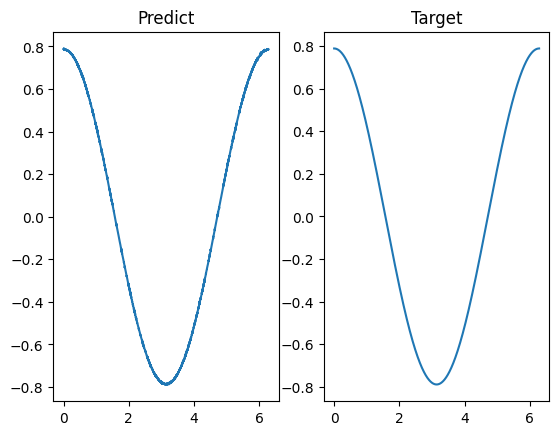

tensor(1.5350e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


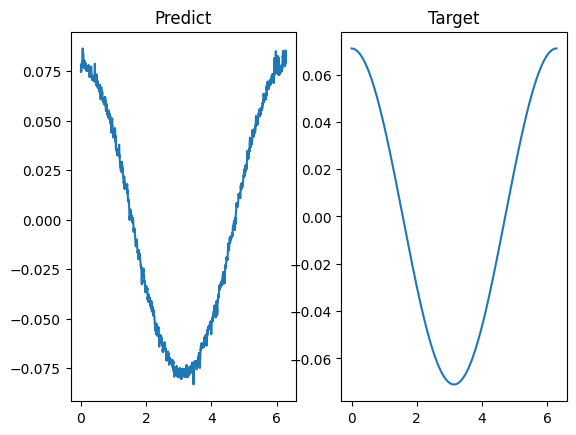

tensor(1.5038e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


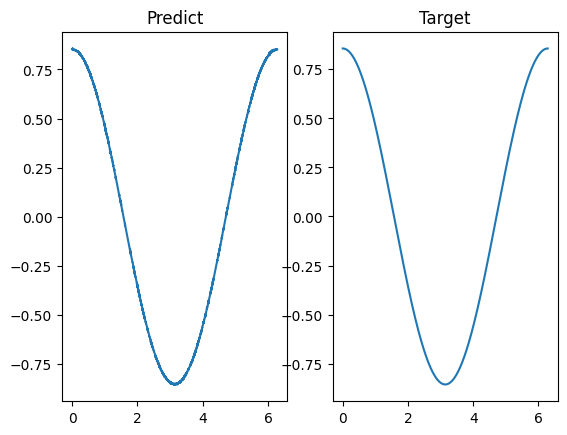

tensor(1.4449e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


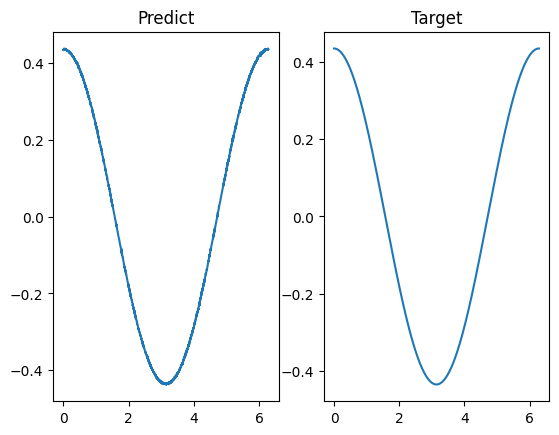

tensor(1.8145e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


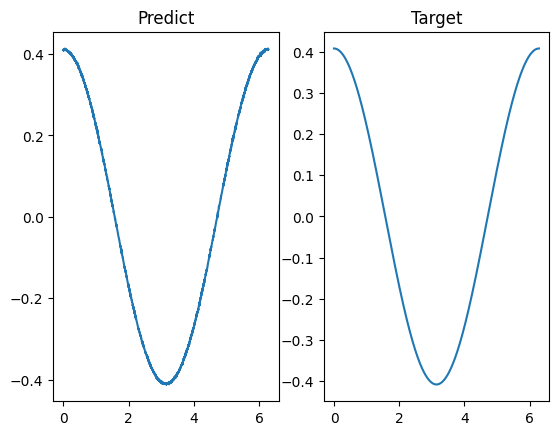

tensor(1.3146e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


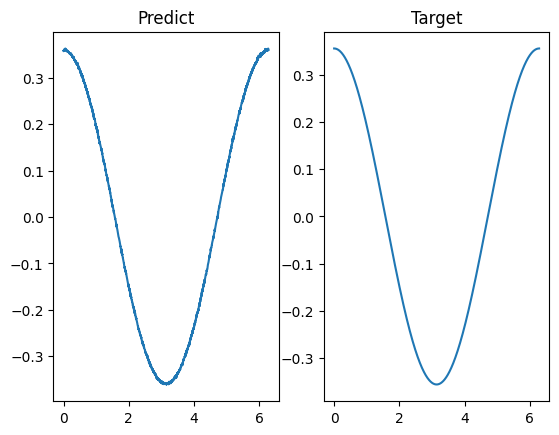

tensor(1.4749e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


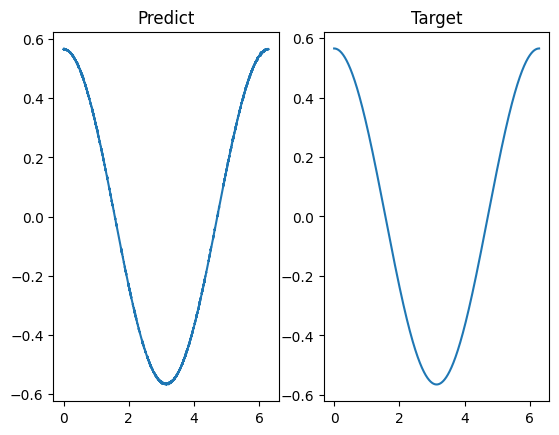

tensor(1.5478e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


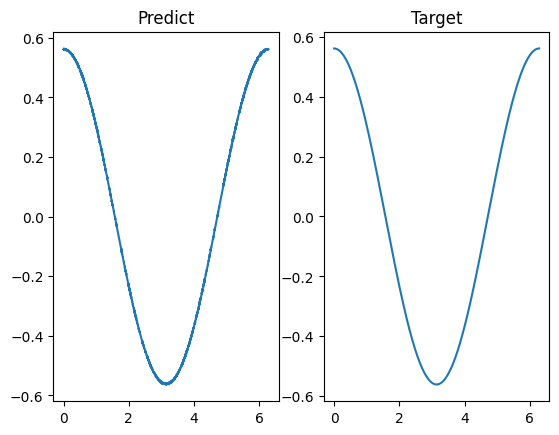

tensor(1.3970e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


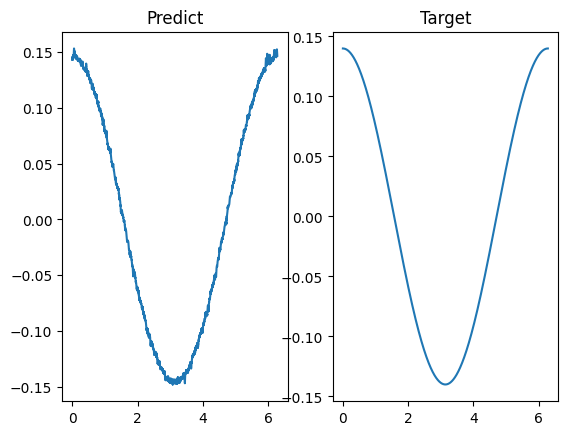

tensor(1.6281e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


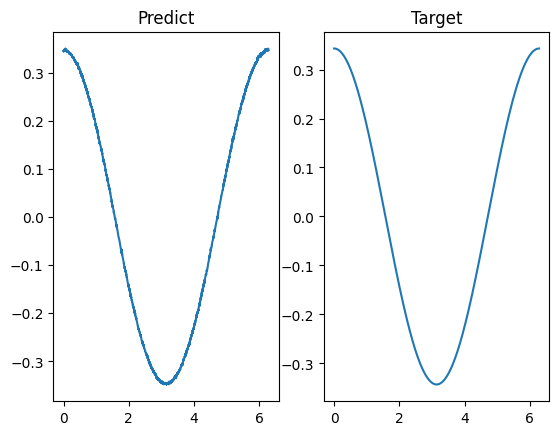

tensor(1.7847e-05, device='cuda:0') tensor(3.6067e-06, device='cuda:0')


  0%|          | 0/32 [00:00<?, ?it/s]

tensor(7.4306e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(6.0355e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(5.6954e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(4.3039e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(3.9148e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.8546e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(5.5867e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(4.4277e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.1515e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(3.4542e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.1596e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(3.2942e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(3.3359e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.1414e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(3.3808e-05, device='cuda:0', grad_fn=<AddBackward0>) tensor(2.5304e-05, device='cuda:0', grad_fn=<DivBackward0>)
tensor(2.8944e-05, device='cuda:0', grad

  0%|          | 0/32 [00:00<?, ?it/s]

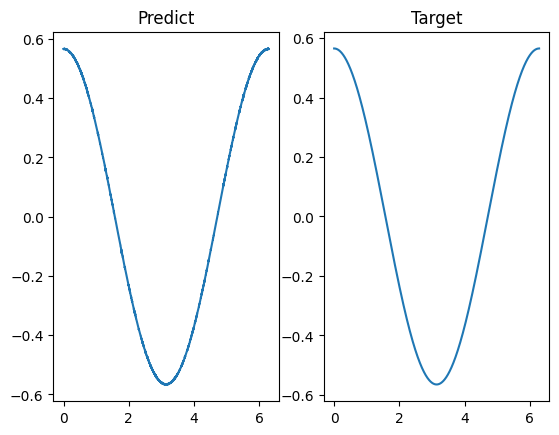

tensor(1.0002e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


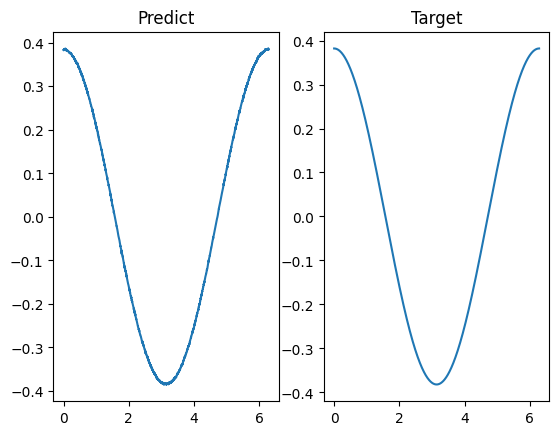

tensor(8.8028e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


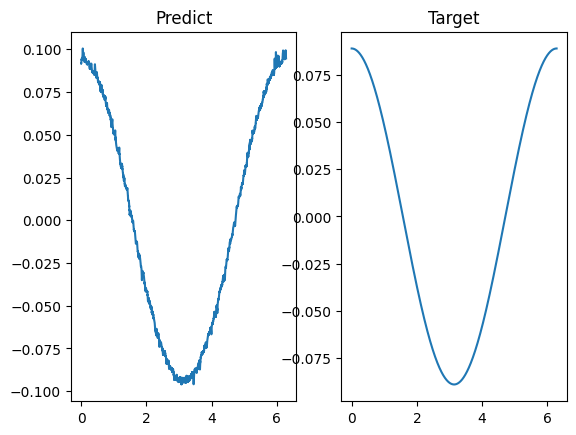

tensor(9.9382e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


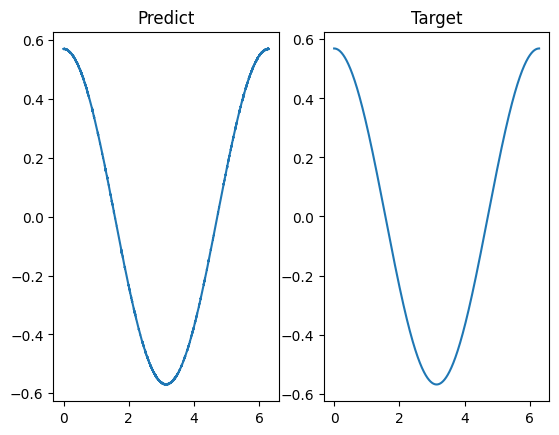

tensor(7.3385e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


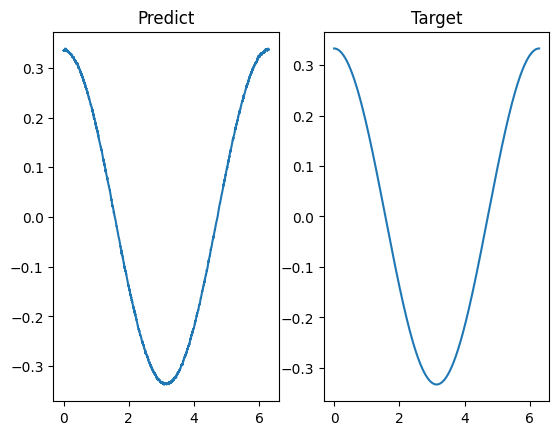

tensor(8.3634e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


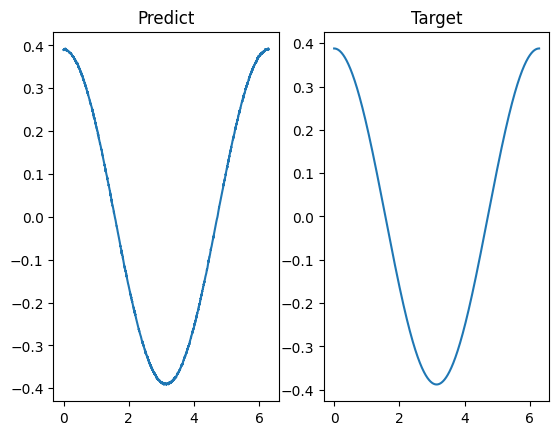

tensor(9.8492e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


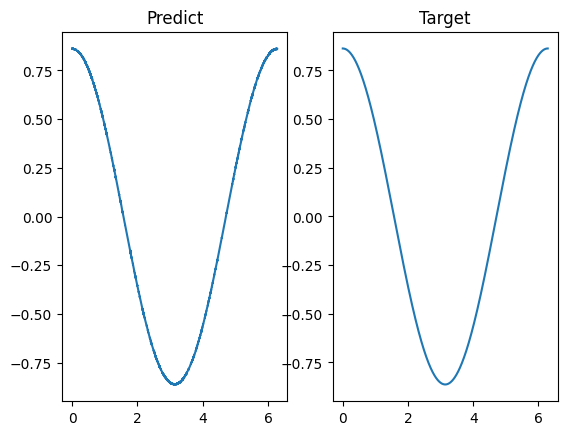

tensor(7.4138e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


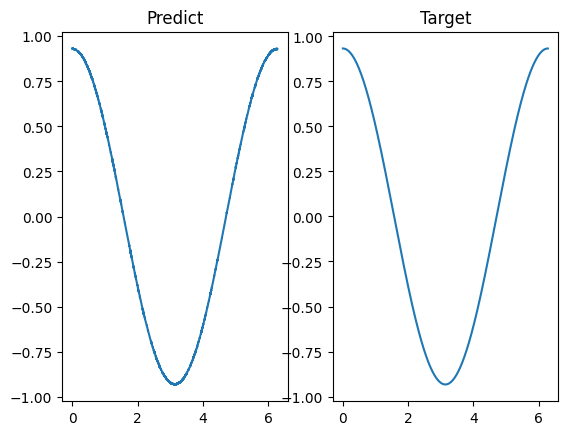

tensor(8.8043e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


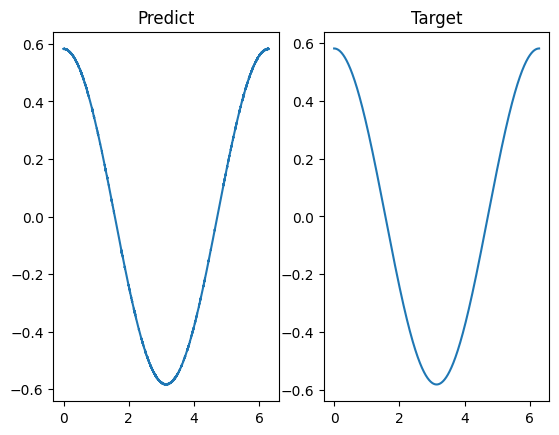

tensor(8.8550e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


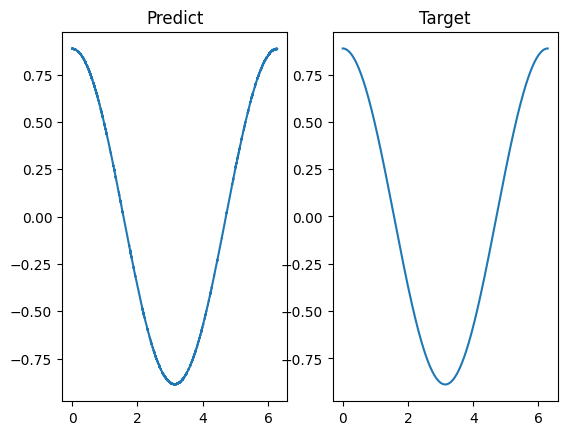

tensor(1.1089e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


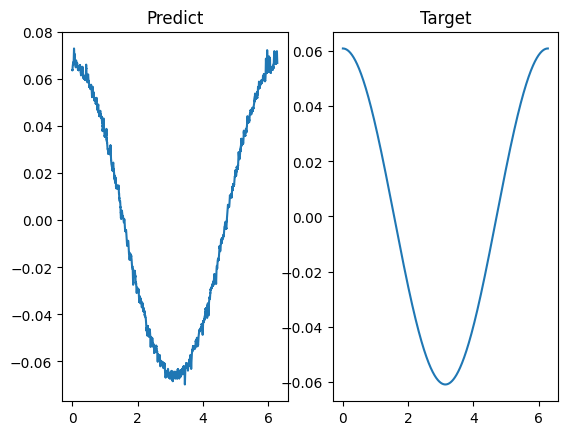

tensor(1.0792e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


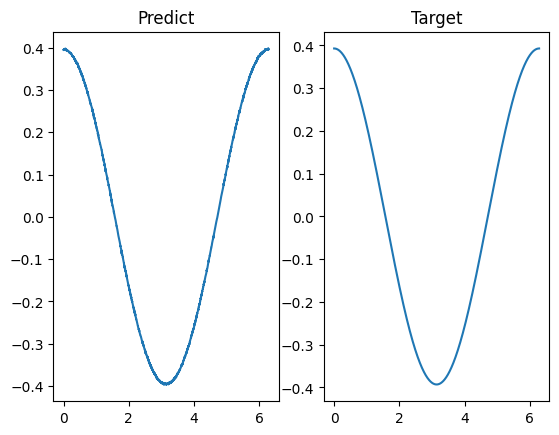

tensor(9.1630e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


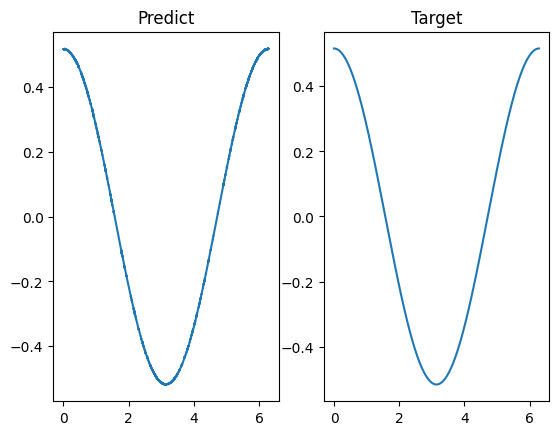

tensor(8.8752e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


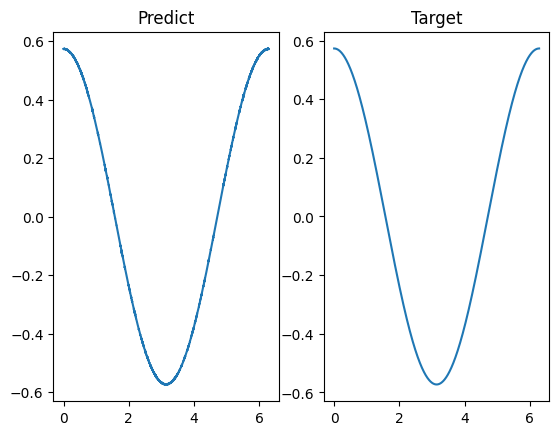

tensor(7.5237e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


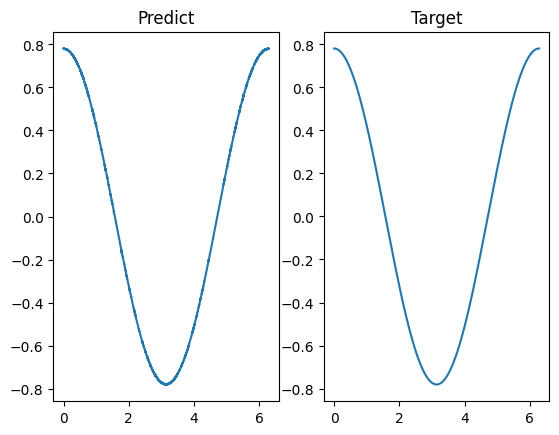

tensor(9.5150e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


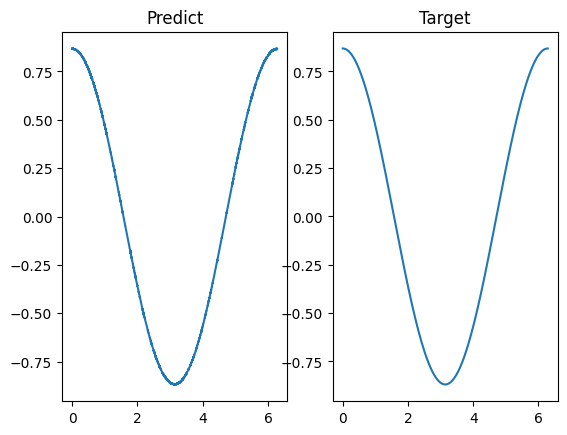

tensor(1.0547e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


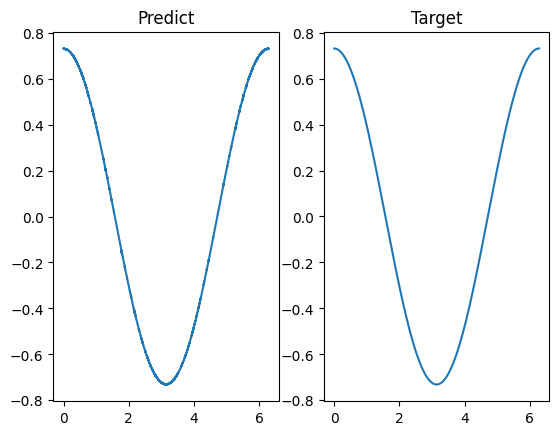

tensor(9.0751e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


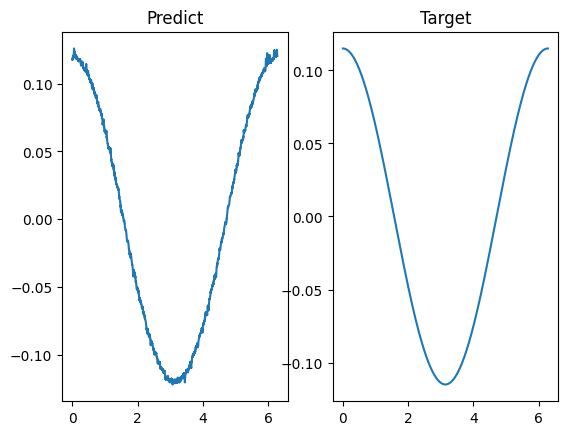

tensor(1.0654e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


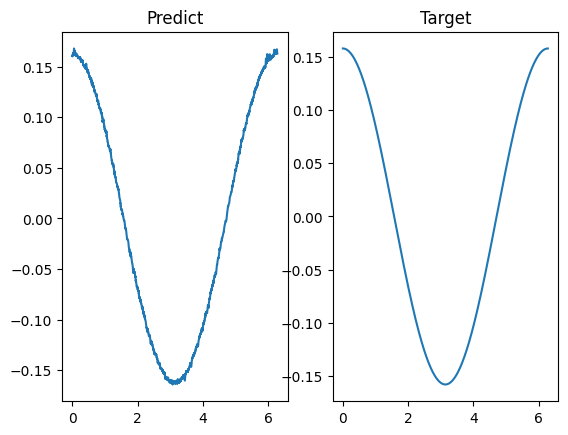

tensor(1.0731e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


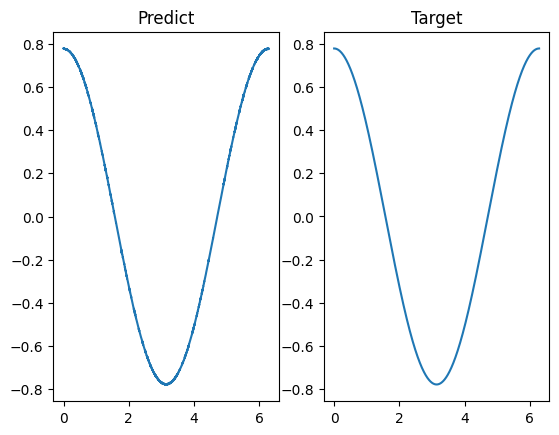

tensor(8.2512e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


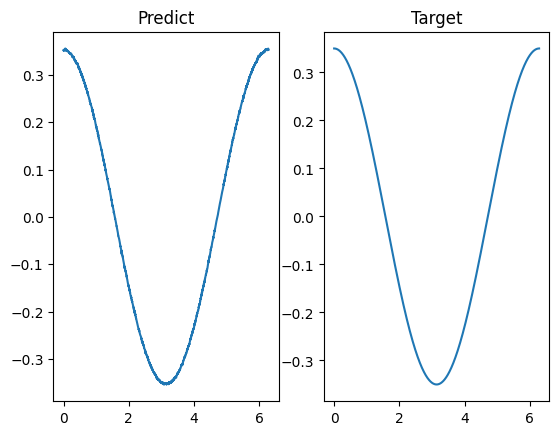

tensor(7.6817e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


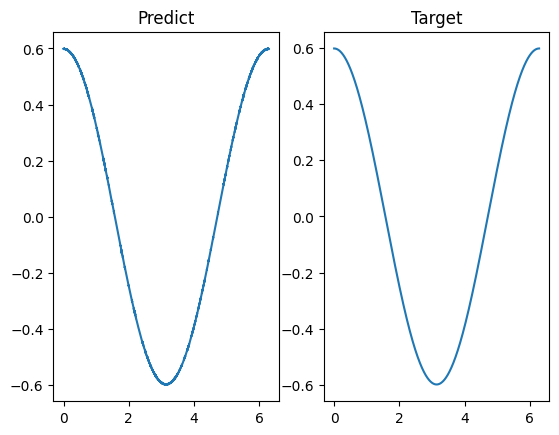

tensor(9.2425e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


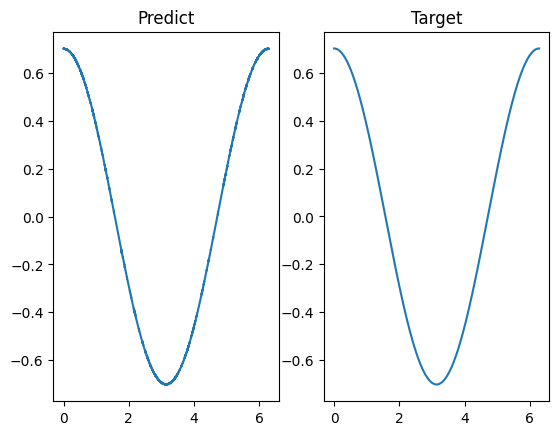

tensor(9.1531e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


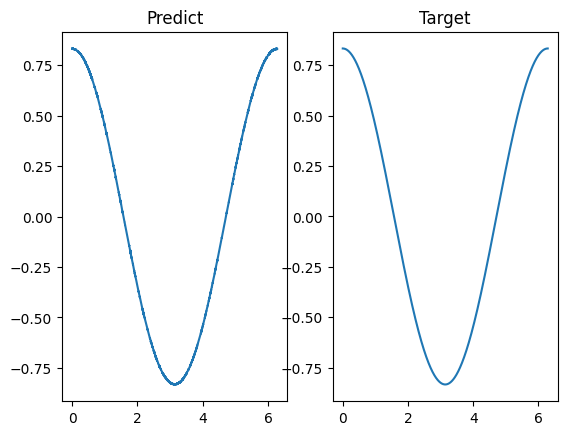

tensor(7.0124e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


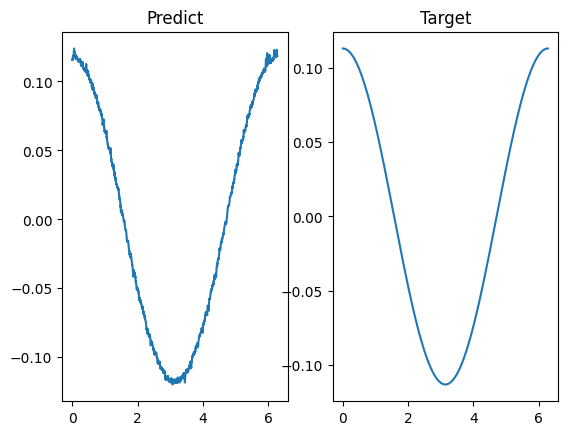

tensor(8.7826e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


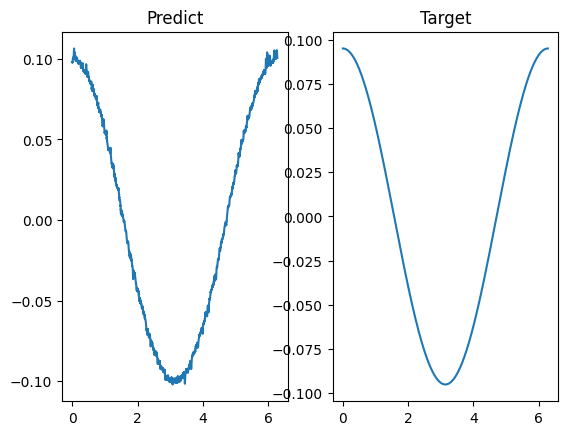

tensor(8.2531e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


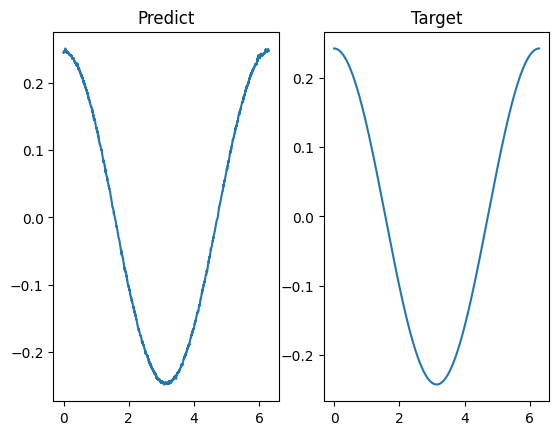

tensor(8.9475e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


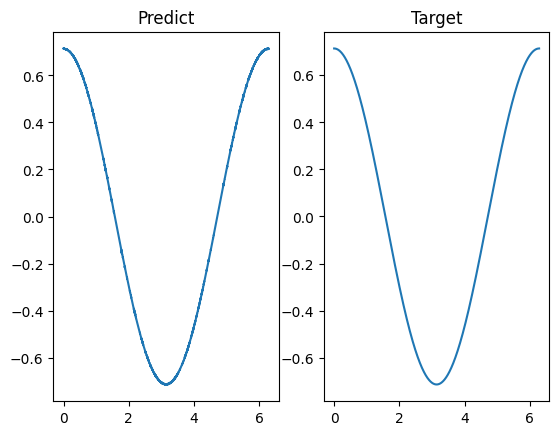

tensor(7.4174e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


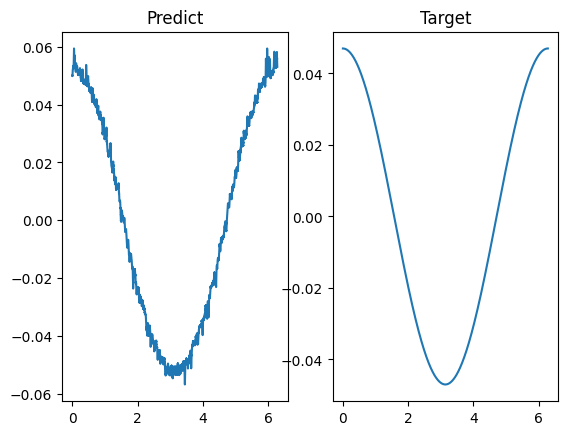

tensor(8.5721e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


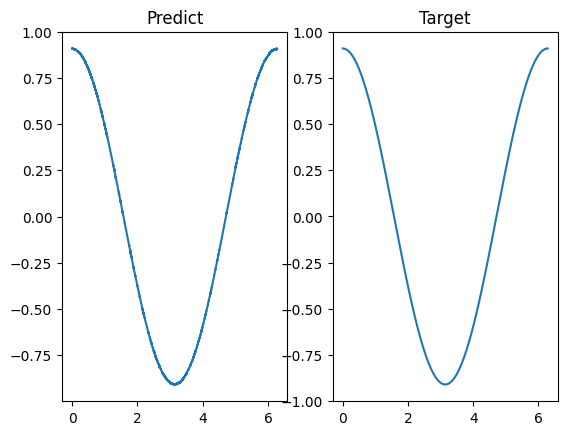

tensor(9.8443e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


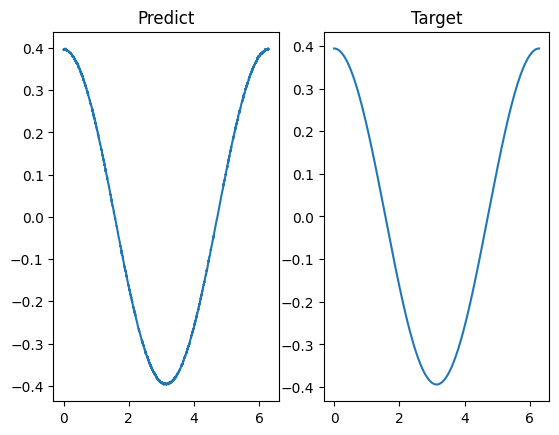

tensor(8.3188e-06, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


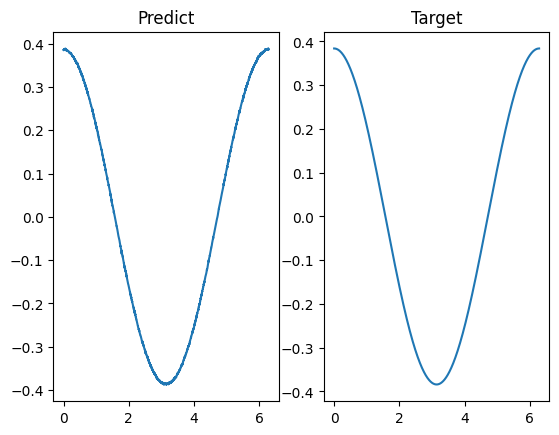

tensor(1.2178e-05, device='cuda:0') tensor(2.5847e-06, device='cuda:0')


In [22]:
### Training
n_epochs = 2
cur_step = 0
t = torch.linspace(0, 2*np.pi, 10240) 
for epoch in range(n_epochs):
  for data, target in tqdm(dataloader):
    data = data.to(device)
    target = target.to(device)
    cur_batch_size = len(data)
    pred = model(data)
    loss1 = criterion(pred, target)
    loss2 = get_add_loss(pred) / 10000
    loss = loss1 + loss2
    print(loss, loss2)
    opt.zero_grad()
    loss.backward()
    opt.step()
  with torch.inference_mode():
    for data_val, target_val in tqdm(dataloader):
      data_val = data_val.to(device)
      target_val = target_val.to(device)
      pred_val = model(data_val)
      make_plot(pred_val[0], target_val[0], t)
      loss1 = criterion(pred_val, target_val)
      loss2 = get_add_loss(pred) / 10000
      loss = loss1 + loss2
      print(loss, loss2)
    cur_step += 1

In [7]:
from pathlib import Path

In [26]:
MODEL_PATH = Path("/content/drive/MyDrive/colab/vmat/1")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

model_path = "lin3.pth"
MODEL_SAVE_PATH = MODEL_PATH / model_path


torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
t = torch.linspace(0, 2*np.pi, 10240) 

In [23]:
test_data, target = next(iter(dataloader_val))

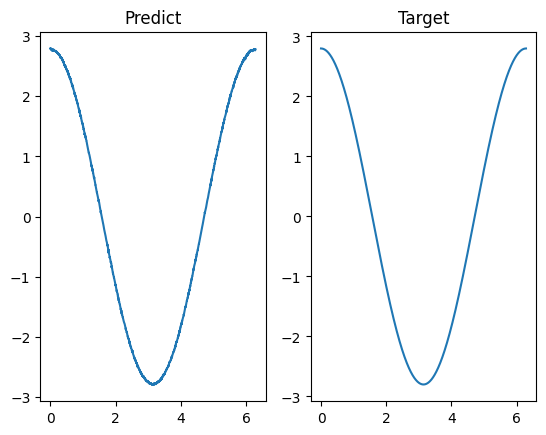

In [25]:
t = torch.linspace(0, 2*np.pi, 10240) 
with torch.inference_mode():
  pred = model(test_data[20].to(device))
  make_plot(pred, target[20], t)